# OPEN SOURCE - BUILDING LLM WITH ART DATA

The motivation is to create an industry specific LLM to be able to perform research on museum data

In [3]:
## Importing Liibraries 
import pandas as pd
import numpy as np
import requests
import os
import json  
import matplotlib.pyplot as plt
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import FAISS
from langchain.chains.question_answering import load_qa_chain
from langchain.llms import OpenAI
from langchain.chains import ConversationalRetrievalChain
import textract
from transformers import GPT2TokenizerFast
from IPython.display import display
import ipywidgets as widgets 

In [4]:
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file


In [5]:
import textract
doc = [textract.process('documents/congress.pdf'),textract.process('documents/dictionary.pdf'),textract.process('documents/forged1.pdf')]



In [6]:
# Write the list of bytes (decoded as strings) to a text file
with open('documents/test.txt', 'w', encoding='utf-8') as f:
    for item in doc:
        decoded_item = item.decode('utf-8')  # Decode each item to a string
        f.write(decoded_item + '\n')  # Write each decoded item followed by a newline character

# Read the data from the same text file
with open('documents/test.txt', 'r', encoding='utf-8') as f:
    text = f.read()

In [7]:
from transformers import GPT2TokenizerFast
tokenizer = GPT2TokenizerFast.from_pretrained("gpt2")

In [8]:
def count_tokens(text: str) -> int:
    return len(tokenizer.encode(text))

text_splitter = RecursiveCharacterTextSplitter(
    #Set a really small chunk size
    chunk_size = 1500,
    chunk_overlap = 150
)

chunks = text_splitter.create_documents([text])

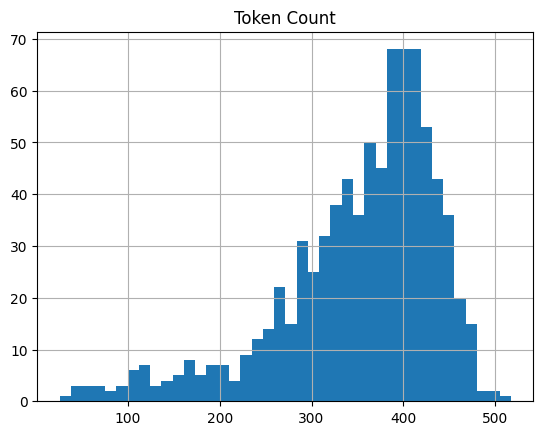

In [10]:
## Token Visualization
token_counts = [count_tokens(chunk.page_content) for chunk in chunks]
df = pd.DataFrame({'Token Count': token_counts})
df.hist(bins=40,)
plt.show()

In [11]:
# Get an Embedding Model
embeddings = OpenAIEmbeddings()

db = FAISS.from_documents(chunks, embeddings)

In [12]:
chain = load_qa_chain(OpenAI(temperature=0), chain_type="stuff")

query = "In the case of Old Masters"
docs = db.similarity_search(query)

chain.run(input_documents=docs, question=query)

' Provenance should be backed by references to previous literature or other sources. For Old Masters and nineteenth-century artists include prices fetched at auction as well as prices paid in private deals (if they are known). Also include the present owner and whereabouts (pay attention to credit lines and confidentiality if required; see above).'

## Create a Chatbot with Chat Memory 

In [14]:
qa = ConversationalRetrievalChain.from_llm(OpenAI(temperature=0.1),db.as_retriever())

In [19]:
chat_history = []

def on_submit(_):
    query = input_box.value
    input_box.value = ""

    if query.lower == 'exit':
        print("Thanks for using the Art Chatbox")
        return
    result = qa({"question": query, "chat_history": chat_history})

    chat_history.append((query, result['answer']))
    display(widgets.HTML(f'<b> User: </b> {query}'))
    display(widgets.HTML(f'<b><font color = "blue"> Chatbot:</font></b> {result["answer"]}'))

print("welcome to my Chatbot")

input_box = widgets.Text(placeholder = 'Please enter your question')
input_box.on_submit(on_submit)

display(input_box)

welcome to my Chatbot


/tmp/ipykernel_14628/2049807037.py:19: DeprecationWarning: on_submit is deprecated. Instead, set the .continuous_update attribute to False and observe the value changing with: mywidget.observe(callback, 'value').
  input_box.on_submit(on_submit)


Text(value='', placeholder='Please enter your question')

HTML(value='<b> User: </b> who is Chevallie')

HTML(value='<b><font color = "blue"> Chatbot:</font></b>  I don\'t know.')

HTML(value='<b> User: </b> did Chevallier and Lasssaigned experimented together')

HTML(value='<b><font color = "blue"> Chatbot:</font></b>  Yes, Chevallier and Lassaigne experimented together …

HTML(value='<b> User: </b> what is this Side aspects: scholarly independence, accountability and liability ')

HTML(value='<b><font color = "blue"> Chatbot:</font></b>  Scholarly independence, accountability, and liabilit…

HTML(value='<b> User: </b> In the case of Old Master')

HTML(value='<b><font color = "blue"> Chatbot:</font></b>  When compiling a CR of an Old Master, it is importan…

HTML(value='<b> User: </b> Ad libitum one could add')

HTML(value='<b><font color = "blue"> Chatbot:</font></b>  When compiling a CR of an Old Master, it is importan…

HTML(value='<b> User: </b> who is Lasssaigned')

HTML(value='<b><font color = "blue"> Chatbot:</font></b>  Lassaigne is not a person. It is a term used to refe…

HTML(value='<b> User: </b> what is  gallo-tannic acid')

HTML(value='<b><font color = "blue"> Chatbot:</font></b>  Gallo-tannic acid is a reagent used to restore writi…

HTML(value='<b> User: </b> suumarize flint knapping')

HTML(value='<b><font color = "blue"> Chatbot:</font></b>  Flint knapping is a technique of striking flakes or …

HTML(value='<b> User: </b> what is a flutted point')

HTML(value='<b><font color = "blue"> Chatbot:</font></b>  A fluted point is a projectile point with a distinct…

HTML(value='<b> User: </b> use fluted point in a sentenc')

HTML(value='<b><font color = "blue"> Chatbot:</font></b>  A fluted point is a distinctive projectile point wit…

HTML(value='<b> User: </b> use flux and folding in one sentenc')

HTML(value='<b><font color = "blue"> Chatbot:</font></b>  Flux is used to lower the melting temperatures of, o…